In [1]:
import os
import zipfile
import random
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
import matplotlib.pyplot as plt

## Data

In [2]:
!wget --no-check-certificate \
    "https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip" \
    -O "/tmp/cats-and-dogs.zip"

local_zip = '/tmp/cats-and-dogs.zip'
zip_ref   = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

--2022-04-18 17:29:18--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip
Resolving download.microsoft.com (download.microsoft.com)... 104.117.232.107, 2600:1409:9800:686::e59, 2600:1409:9800:693::e59
Connecting to download.microsoft.com (download.microsoft.com)|104.117.232.107|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824894548 (787M) [application/octet-stream]
Saving to: ‘/tmp/cats-and-dogs.zip’

/tmp/cats-and-dogs. 100%[===================>] 786.68M   198MB/s    in 3.8s    

2022-04-18 17:29:22 (207 MB/s) - ‘/tmp/cats-and-dogs.zip’ saved [824894548/824894548]



In [3]:
source_path = '/tmp/PetImages'

source_path_dogs = os.path.join(source_path, 'Dog')
source_path_cats = os.path.join(source_path, 'Cat')


# os.listdir returns a list containing all files under the given path
print(f"There are {len(os.listdir(source_path_dogs))} images of dogs.")
print(f"There are {len(os.listdir(source_path_cats))} images of cats.")

There are 12501 images of dogs.
There are 12501 images of cats.


**Expected Output:**

```
There are 12501 images of dogs.
There are 12501 images of cats.
```

You will need a directory for cats-v-dogs, and subdirectories for training
and testing. These in turn will need subdirectories for 'cats' and 'dogs'. To accomplish this, complete the `create_train_test_dirs` below:

In [5]:
# Define root directory
root_dir = '/tmp/cats-v-dogs'

# Empty directory to prevent FileExistsError if the function is run several times
if os.path.exists(root_dir):
  shutil.rmtree(root_dir)

def create_train_test_dirs(root_path):
  train_dir = os.path.join(root_path,'training')
  train_cats = os.path.join(train_dir,'cats')
  train_dogs = os.path.join(train_dir, 'dogs')
  test_dir = os.path.join(root_path,'testing')
  test_cats = os.path.join(test_dir, 'cats')
  test_dogs = os.path.join(test_dir, 'dogs')

  os.makedirs(root_path, exist_ok=True)
  os.makedirs(train_dir, exist_ok=True)
  os.makedirs(train_cats, exist_ok=True)
  os.makedirs(train_dogs, exist_ok=True)
  os.makedirs(test_dir, exist_ok=True)
  os.makedirs(test_cats, exist_ok=True)
  os.makedirs(test_dogs, exist_ok=True)


  
try:
  create_train_test_dirs(root_path=root_dir)
except FileExistsError:
  print("You should not be seeing this since the upper directory is removed beforehand")

In [6]:
# Testing create_train_test_dirs function

for rootdir, dirs, files in os.walk(root_dir):
    for subdir in dirs:
        print(os.path.join(rootdir, subdir))

/tmp/cats-v-dogs/testing
/tmp/cats-v-dogs/training
/tmp/cats-v-dogs/testing/cats
/tmp/cats-v-dogs/testing/dogs
/tmp/cats-v-dogs/training/cats
/tmp/cats-v-dogs/training/dogs


**Expected Output (directory order might vary):**

``` txt
/tmp/cats-v-dogs/training
/tmp/cats-v-dogs/testing
/tmp/cats-v-dogs/training/cats
/tmp/cats-v-dogs/training/dogs
/tmp/cats-v-dogs/testing/cats
/tmp/cats-v-dogs/testing/dogs

```

In [7]:

def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
  """Funstion to split the data"""
  source_files = os.listdir(SOURCE)
  files = []
  for i in source_files:
    file = os.path.join(SOURCE, i)
    if os.path.getsize(file):
      files.append(i)
    else:
      print(f"{i} is zero length, so ignoring.")

  shuffled_files = random.sample(files, len(files))
  split_point = int(len(files) * SPLIT_SIZE)


  for i in shuffled_files[:split_point]:
    filepath = os.path.join(SOURCE,i)
    destination = os.path.join(TRAINING,i)
    copyfile(filepath,destination)

  for i in shuffled_files[split_point:]:
    filepath = os.path.join(SOURCE,i)
    destination = os.path.join(TESTING,i)
    copyfile(filepath,destination)



In [8]:
# Define paths
CAT_SOURCE_DIR = "/tmp/PetImages/Cat/"
DOG_SOURCE_DIR = "/tmp/PetImages/Dog/"

TRAINING_DIR = "/tmp/cats-v-dogs/training/"
TESTING_DIR = "/tmp/cats-v-dogs/testing/"

TRAINING_CATS_DIR = os.path.join(TRAINING_DIR, "cats/")
TESTING_CATS_DIR = os.path.join(TESTING_DIR, "cats/")

TRAINING_DOGS_DIR = os.path.join(TRAINING_DIR, "dogs/")
TESTING_DOGS_DIR = os.path.join(TESTING_DIR, "dogs/")

# Empty directories in case this cell is run multiple times
if len(os.listdir(TRAINING_CATS_DIR)) > 0:
  for file in os.scandir(TRAINING_CATS_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_DOGS_DIR)) > 0:
  for file in os.scandir(TRAINING_DOGS_DIR):
    os.remove(file.path)
if len(os.listdir(TESTING_CATS_DIR)) > 0:
  for file in os.scandir(TESTING_CATS_DIR):
    os.remove(file.path)
if len(os.listdir(TESTING_DOGS_DIR)) > 0:
  for file in os.scandir(TESTING_DOGS_DIR):
    os.remove(file.path)

split_size = .9


split_data(CAT_SOURCE_DIR, TRAINING_CATS_DIR, TESTING_CATS_DIR, split_size)
split_data(DOG_SOURCE_DIR, TRAINING_DOGS_DIR, TESTING_DOGS_DIR, split_size)

print(f"\n\nThere are {len(os.listdir(TRAINING_CATS_DIR))} images of cats for training")
print(f"There are {len(os.listdir(TRAINING_DOGS_DIR))} images of dogs for training")
print(f"There are {len(os.listdir(TESTING_CATS_DIR))} images of cats for testing")
print(f"There are {len(os.listdir(TESTING_DOGS_DIR))} images of dogs for testing")

666.jpg is zero length, so ignoring.
11702.jpg is zero length, so ignoring.


There are 11250 images of cats for training
There are 11250 images of dogs for training
There are 1250 images of cats for testing
There are 1250 images of dogs for testing


In [9]:
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):


  # Instantiate the ImageDataGenerator class
  train_datagen = ImageDataGenerator(rescale=1/255,
                                     rotation_range=0.2,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     shear_range=0.2,
                                     zoom_range=0.2,
                                     horizontal_flip=True,
                                     )
  validation_datagen = ImageDataGenerator(rescale=1/255)
  

  train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=32,
                                                      class_mode='binary',
                                                      target_size=(150, 150))

  validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                batch_size=32,
                                                                class_mode='binary',
                                                                target_size=(150, 150))

  return train_generator, validation_generator


In [10]:
# Testing the generators
train_generator, validation_generator = train_val_generators(TRAINING_DIR, TESTING_DIR)

Found 22498 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


**Expected Output:**

```
Found 22498 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.
```


## Model and Training

In [11]:
def create_model():
  """Creates and compiles model."""
  model = tf.keras.models.Sequential([ 
      tf.keras.layers.Conv2D(32, 3, activation='relu', input_shape=(150,150,3)),
      tf.keras.layers.MaxPool2D((2,2)),
      tf.keras.layers.Conv2D(32, 3, activation='relu', ),
      tf.keras.layers.MaxPool2D((2,2)),
      tf.keras.layers.Conv2D(32, 3, activation='relu', ),
      tf.keras.layers.MaxPool2D((2,2)),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(100, activation='relu'),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  
  model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy']) 
    
  return model


Now it is time to train your model!

Note: You can ignore the `UserWarning: Possibly corrupt EXIF data.` warnings.

In [12]:
# Get the untrained model
model = create_model()

# Train the model
history = model.fit(train_generator,
                    epochs=15,
                    verbose=1,
                    validation_data=validation_generator)

Epoch 1/15
592/704 [========================>.....] - ETA: 28s - loss: 0.6775 - accuracy: 0.5715

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only

704/704 [==============================] - 196s 263ms/step - loss: 0.6704 - accuracy: 0.5819 - val_loss: 0.6092 - val_accuracy: 0.6656
Epoch 2/15
704/704 [==============================] - 185s 263ms/step - loss: 0.5968 - accuracy: 0.6769 - val_loss: 0.5438 - val_accuracy: 0.7224
Epoch 3/15
704/704 [==============================] - 179s 254ms/step - loss: 0.5455 - accuracy: 0.7227 - val_loss: 0.4912 - val_accuracy: 0.7620
Epoch 4/15
704/704 [==============================] - 176s 249ms/step - loss: 0.5160 - accuracy: 0.7475 - val_loss: 0.4674 - val_accuracy: 0.7880
Epoch 5/15
704/704 [==============================] - 175s 249ms/step - loss: 0.4911 - accuracy: 0.7616 - val_loss: 0.4503 - val_accuracy: 0.7920
Epoch 6/15
704/704 [==============================] - 175s 249ms/step - loss: 0.4777 - accuracy: 0.7704 - val_loss: 0.4049 - val_accuracy: 0.8260
Epoch 7/15
704/704 [==============================] - 175s 249ms/step - loss: 0.4649 - accuracy: 0.7790 - val_loss: 0.4496 - val_accura

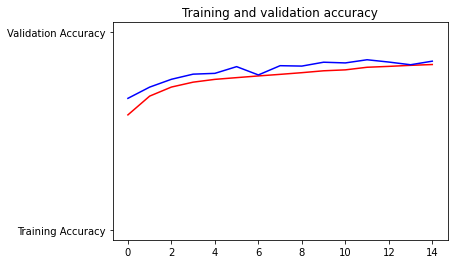

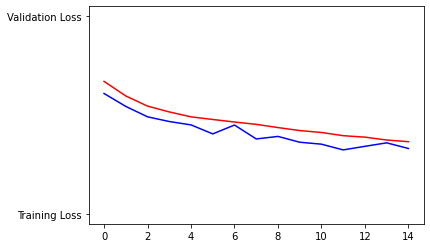

In [13]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.show()
print("")

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.show()